<a href="https://colab.research.google.com/github/Jabed-Hasan/python/blob/main/Lab_Report_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE 412: Machine Learning Lab
# Lab Report 01
## K-Nearest Neighbors Classification

**Student ID:** 221002184

**Student Name:** Md Jabed Hasan  
**Section:** 221D1

**Instructor:** Md. Jahid Tanvir  
**Date:** Jul 2, 2025


## Objectives

- Explore and implement the **K-Nearest Neighbors (KNN)** classification  algorithm using Python and the Scikit-learn library.
- Experiment with different values of **K** to identify the value that gives the best classification accuracy.
- Investigate how varying **train/test split ratios** affect KNN classification performance on the **Iris dataset**.
- Apply the same analysis to a **synthetic dataset**, then compare and discuss the results with those from the Iris dataset.
- Visualize and interpret findings to understand the impact of K and data splitting on model performance.


## Introduction

**K-Nearest Neighbors (KNN)** is a simple yet powerful non-parametric, instance-based learning algorithm used for classification and regression tasks.  
In classification, KNN assigns a data point to the most common class among its **K nearest neighbors** in the feature space, based on a chosen distance metric (commonly Euclidean distance).

This experiment focuses on:
- Understanding how varying the value of **K** affects classification accuracy.
- Exploring how different **train/test split ratios** influence model performance.
- Comparing these effects on both a **real-world dataset** (Iris) and a **synthetic dataset** to gain deeper insights into the behavior of KNN.


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


## Experiment 1: Finding the Best K

**Objective:**  
Evaluate KNN classifier performance on the Iris dataset with varying K values (1 to 10). For each K, we will:
- Perform 10 random train/test splits (70% train, 30% test).
- Standardize the data.
- Train and evaluate the classifier.
- Calculate the average accuracy across 10 runs.

This will help identify the optimal K for the dataset.


=== Best K Experiment ===
K=1: Average Accuracy=0.9444
K=2: Average Accuracy=0.9511
K=3: Average Accuracy=0.9533
K=4: Average Accuracy=0.9511
K=5: Average Accuracy=0.9556
K=6: Average Accuracy=0.9578
K=7: Average Accuracy=0.9622
K=8: Average Accuracy=0.9556
K=9: Average Accuracy=0.9600


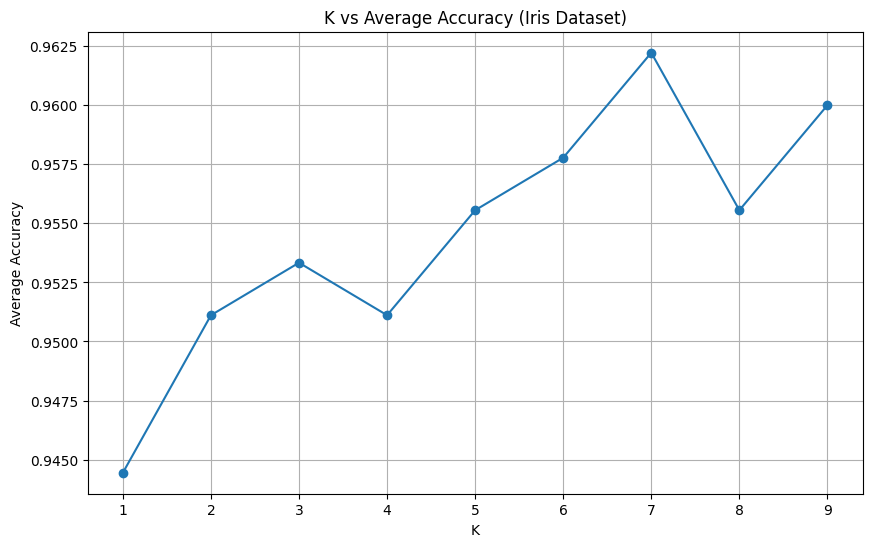


Best K: 7 (Accuracy: 0.9622)


In [3]:
iris = load_iris()
X = iris.data
y = iris.target

k_values = range(1, 10)
k_avg_accuracies = []

print("=== Best K Experiment ===")
for k in k_values:
    accuracies = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
    avg_acc = np.mean(accuracies)
    k_avg_accuracies.append(avg_acc)
    print(f"K={k}: Average Accuracy={avg_acc:.4f}")

plt.figure(figsize=(10,6))
plt.plot(k_values, k_avg_accuracies, marker='o')
plt.title("K vs Average Accuracy (Iris Dataset)")
plt.xlabel("K")
plt.ylabel("Average Accuracy")
plt.grid()
plt.show()

best_k = k_values[np.argmax(k_avg_accuracies)]
print(f"\nBest K: {best_k} (Accuracy: {max(k_avg_accuracies):.4f})")


### Result Analysis

The plot above shows how classification accuracy varies with K. The optimal K value is identified as the K with the highest average accuracy. Generally, too small K can lead to overfitting, while too large K increases bias. This experiment helps select a balanced K.


## Experiment 2: Finding the Best Train/Test Split Ratio on Iris Dataset

**Objective:**  
Evaluate classifier performance with different train/test split ratios: 0.2, 0.35, 0.45, 0.5 (i.e., 20%, 35%, 45%, 50% test data). For each split ratio:
- Perform 10 random splits.
- Use the best K found in Experiment 1.
- Compute and average the accuracies.



=== Best Split Ratio (Iris Dataset) ===
Split Ratio 0.2: Average Accuracy=0.9633
Split Ratio 0.35: Average Accuracy=0.9623
Split Ratio 0.45: Average Accuracy=0.9529
Split Ratio 0.5: Average Accuracy=0.9480


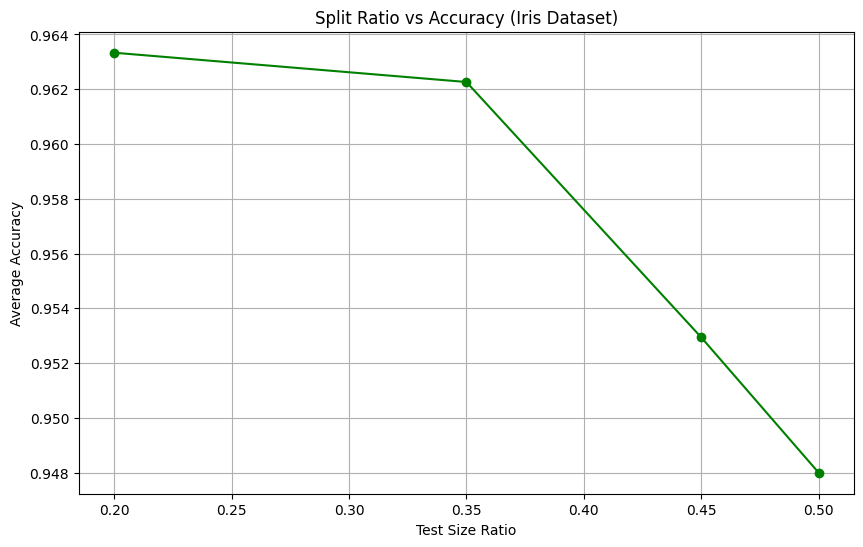


Best Split Ratio for Iris Dataset: 0.2 (Accuracy: 0.9633)


In [4]:
split_ratios = [0.2, 0.35, 0.45, 0.5]
split_avg_accuracies = []

print("\n=== Best Split Ratio (Iris Dataset) ===")
for split in split_ratios:
    accuracies = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=i)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=best_k)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
    avg_acc = np.mean(accuracies)
    split_avg_accuracies.append(avg_acc)
    print(f"Split Ratio {split}: Average Accuracy={avg_acc:.4f}")

plt.figure(figsize=(10,6))
plt.plot(split_ratios, split_avg_accuracies, marker='o', color='green')
plt.title("Split Ratio vs Accuracy (Iris Dataset)")
plt.xlabel("Test Size Ratio")
plt.ylabel("Average Accuracy")
plt.grid()
plt.show()

best_split_idx = np.argmax(split_avg_accuracies)
best_split_ratio = split_ratios[best_split_idx]
print(f"\nBest Split Ratio for Iris Dataset: {best_split_ratio} (Accuracy: {split_avg_accuracies[best_split_idx]:.4f})")


### Result Analysis

The graph shows how different proportions of training and testing data affect model performance. Generally, a larger training set yields better generalization. The best ratio is identified based on highest average accuracy.


## Experiment 3: Train/Test Split Ratio on Synthetic Dataset

**Objective:**  
Create a synthetic dataset with 3 classes and 4 features, and repeat the split ratio experiment to observe whether similar trends hold.



=== Best Split Ratio (Synthetic Dataset) ===
Synthetic Split Ratio 0.2: Average Accuracy=0.6720
Synthetic Split Ratio 0.35: Average Accuracy=0.6534
Synthetic Split Ratio 0.45: Average Accuracy=0.6319
Synthetic Split Ratio 0.5: Average Accuracy=0.6328


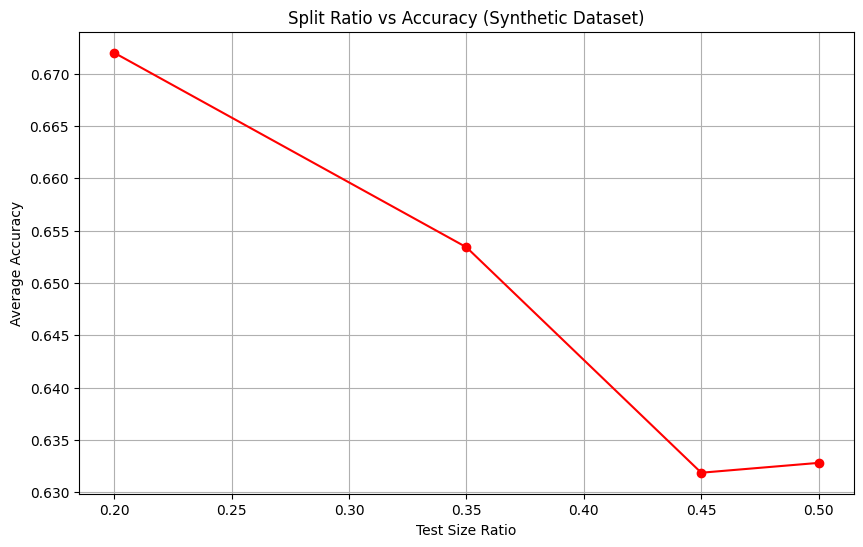


Best Split Ratio for Synthetic Dataset: 0.2 (Accuracy: 0.6720)


In [11]:
X_syn, y_syn = make_classification(
    n_samples=250,
    n_features=7,
    n_informative=5,
    n_redundant=1,
    n_classes=4,
    random_state=45
)

split_avg_accuracies_syn = []

print("\n=== Best Split Ratio (Synthetic Dataset) ===")
for split in split_ratios:
    accuracies = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X_syn, y_syn, test_size=split, random_state=i)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=best_k)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
    avg_acc = np.mean(accuracies)
    split_avg_accuracies_syn.append(avg_acc)
    print(f"Synthetic Split Ratio {split}: Average Accuracy={avg_acc:.4f}")

plt.figure(figsize=(10,6))
plt.plot(split_ratios, split_avg_accuracies_syn, marker='o', color='red')
plt.title("Split Ratio vs Accuracy (Synthetic Dataset)")
plt.xlabel("Test Size Ratio")
plt.ylabel("Average Accuracy")
plt.grid()
plt.show()

best_split_idx_syn = np.argmax(split_avg_accuracies_syn)
best_split_ratio_syn = split_ratios[best_split_idx_syn]
print(f"\nBest Split Ratio for Synthetic Dataset: {best_split_ratio_syn} (Accuracy: {split_avg_accuracies_syn[best_split_idx_syn]:.4f})")


### Result Analysis

This synthetic dataset helps validate whether the trends in train/test split performance generalize beyond the Iris dataset. Observing differences helps understand data sensitivity in KNN.
